# **Problem 2**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [ ]:
from google.colab import files
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
uploaded=files.upload()

Saving Boston.csv to Boston.csv


In [ ]:
for fn in uploaded.keys():
 print('file"{name}" length{length}'.format(name=fn,length=len(uploaded[fn])))
boston=pd.read_csv(io.StringIO(uploaded['Boston.csv'].decode('utf-8')))

file"Boston.csv" length37658


In [ ]:
boston.head()


,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


**a. How  many  rows  are  in  this  data  set?   How  many  columns?   What  do  the  rows  and columns represent?**

In [ ]:
boston.shape

(506, 15)

The corrected Boston data set has 506 rows and 15 columns. Each row represents a particular details of land within the city of Boston. 

*   Crim: Crime rate
*   Chas: Land is accross the Charles River or not
*   nox: Nitric oxides concentration
*   rm: Average number of rooms  
*   dis: Distance from the Boston employment centers
*   tax: Property tax rate
*   ptratio: Pupil-teacher ratio
*   black: proportion of black residents 
*   lstat: Percent of land owners with lower status
*   medv: Median value


**b. Make some pairwise scatterplots of the predictors (columns) in this data set.  Describe your findings.**

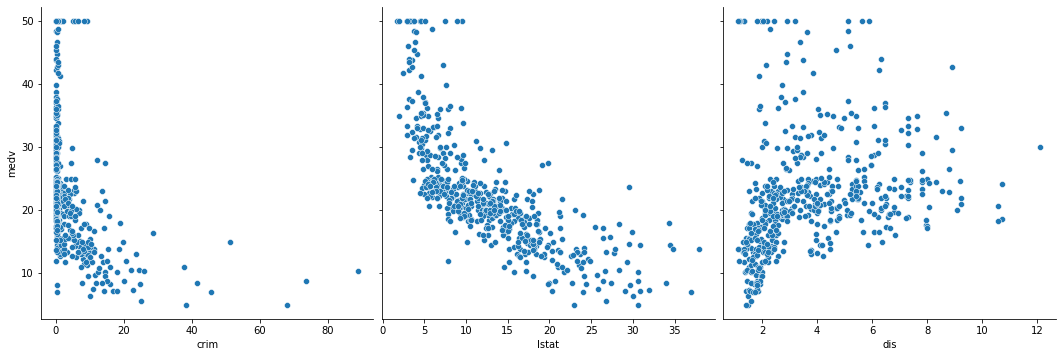

In [ ]:
lstatMedv = sns.pairplot(boston, x_vars = ["crim","lstat","dis"], y_vars = ["medv"], height = 5)

land with higher median values have a greater proportion of lower-status residence. Crime rate is more at land with less median value.

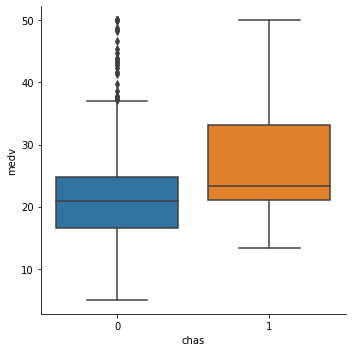

In [ ]:
chasmedv = sns.catplot(x = "chas", y = "medv", kind = "box", order = [0, 1], data = boston)

From above box plot we can say that land who borders Charles river are higher in median value

**c. Are  any  of  the  predictors  associated  with  per  capita  crime  rate?   If  so,  explain  the relationship.**

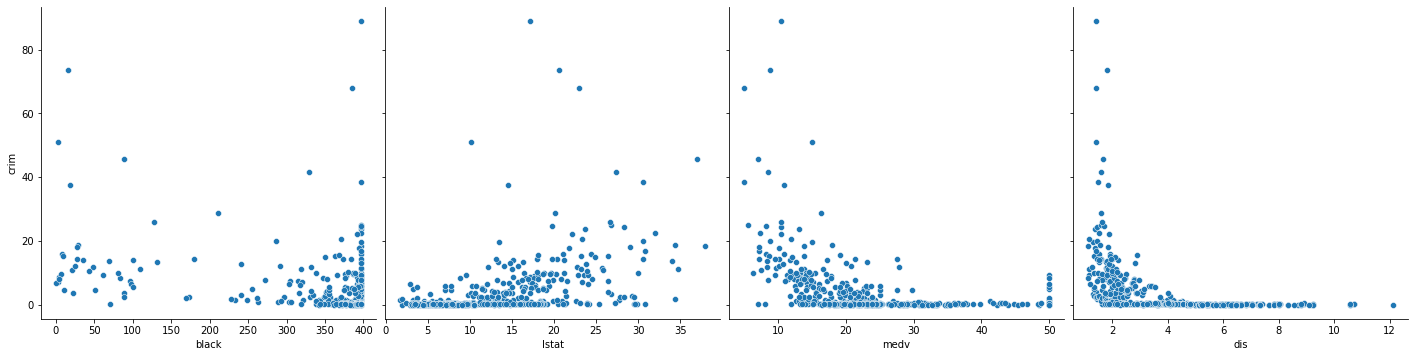

In [ ]:
scatterplot = sns.pairplot(boston, x_vars = ["black", "lstat", "medv", "dis"], y_vars = ["crim"], height = 5)

There is relationships between crime rate and median value, lower status residents, and distance from Boston employment centers.
Land with lower home values have higher crime rates.Lands which are close Boston employment centers have higher crime rate.
Land with higher rate of lower status residents have higher crime rates.

**d. Do  any  of  the  suburbs  of  Boston  appear  to  have  particularly  high  crime  rates?   Taxrates?  Pupil-teacher ratios?  Comment on the range of each predictor.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, ''), Text(0.5, 1.0, 'barchart for pupil-teacher ratio')]

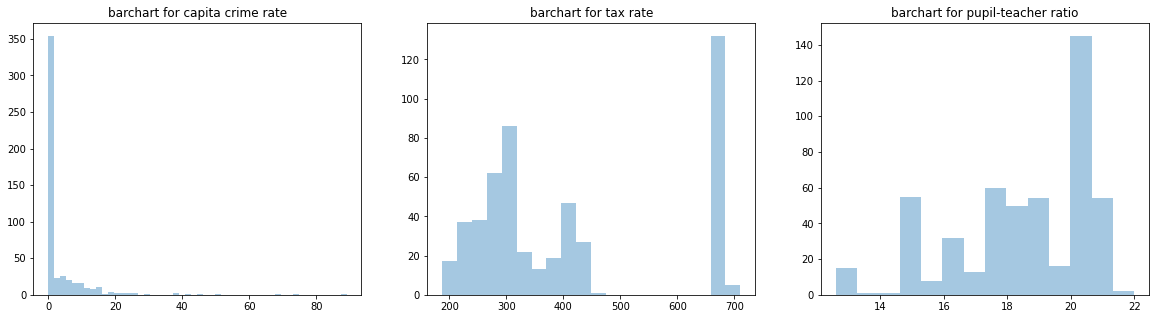

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 5))
sns.distplot(boston["crim"], kde = False, ax = axes[0])
axes[0].set(xlabel = "", title = "barchart for capita crime rate")
sns.distplot(boston["tax"], bins = 20, kde = False, ax = axes[1])
axes[1].set(xlabel = "", title = "barchart for tax rate")
sns.distplot(boston["ptratio"], kde = False, ax = axes[2])
axes[2].set(xlabel = "", title = "barchart for pupil-teacher ratio")

In [ ]:
boston.loc[:, ["crim", "tax", "ptratio"]].describe()

,crim,tax,ptratio
count,506.000000,506.000000,506.000000
mean,3.613524,408.237154,18.455534
std,8.601545,168.537116,2.164946
min,0.006320,187.000000,12.600000
25%,0.082045,279.000000,17.400000
50%,0.256510,330.000000,19.050000
75%,3.677082,666.000000,20.200000
max,88.976200,711.000000,22.000000


From above bar chart, Lands near to Boston employment center have high crime rates, tax rates, or pupil-teacher ratios.


1.   The minimum crime rate is 0.00632, and maximum is 88.97620, with a median of 0.25651. 
2.   The minimum tax rate is \$187, while the maximum is \$711, with a median of \$330. 
3.   The minimum pupil-teacher ratio is 12.60 pupils per teacher, while the maximum is 22, with a median of 19.05. 

**e. How many of the suburbs in this data set bound the Charles river?**

In [ ]:
boston["chas"].sum()

35

35 suburbs bound the Charles river.

**f. What is the median pupil-teacher ratio among the towns in this data set?**

In [ ]:
boston["ptratio"].describe()

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: ptratio, dtype: float64

The median pupil-teacher ratio among towns in this data set is 19.05 pupils per teacher.

**g. Which suburb of Boston has lowest median value of owner- occupied homes?  What arethe values of the other predictors for that suburb, and how do those values compare to the overallranges for those predictors?  Comment on your findings**

In [ ]:
min_medv = boston["medv"].min()
boston[boston["medv"] == min_medv]

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
398,399,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
405,406,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0


In [ ]:
boston.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Above two suburb of Boston has lowest median value of owner- occupied homes.

For these suburbs overall range of other predictors are at extrem ends.

for example
Both of these suburbs have very high crime rates compared to the overall range for that variable,with values 38.3518 and 67.9208.
both suburbs have a high proportion of lower status residents (values of 30.59 and 22.98)


**h. In this data set, how many of the suburbs average more than seven rooms per dwelling?More than eight rooms per dwelling?  Comment on the suburbs that average more than eight roomsper dwelling.**

In [ ]:
print('Number of racts which average more than seven rooms per dwelling:',(boston["rm"] > 7).sum() )

Number of racts which average more than seven rooms per dwelling: 64


In [ ]:
print('Number of racts which average more than seven rooms per dwelling:',(boston["rm"] > 8).sum() )

Number of racts which average more than seven rooms per dwelling: 13


In [ ]:
boston.loc[boston["rm"] > 8].describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,232.307692,0.718795,13.615385,7.078462,0.153846,0.539238,8.348538,71.538462,3.430192,7.461538,325.076923,16.361538,385.210769,4.310000,44.200000
std,60.915768,0.901640,26.298094,5.392767,0.375534,0.092352,0.251261,24.608723,1.883955,5.332532,110.971063,2.410580,10.529359,1.373566,8.092383
min,98.000000,0.020090,0.000000,2.680000,0.000000,0.416100,8.034000,8.400000,1.801000,2.000000,224.000000,13.000000,354.550000,2.470000,21.900000
25%,225.000000,0.331470,0.000000,3.970000,0.000000,0.504000,8.247000,70.400000,2.288500,5.000000,264.000000,14.700000,384.540000,3.320000,41.700000
50%,233.000000,0.520140,0.000000,6.200000,0.000000,0.507000,8.297000,78.300000,2.894400,7.000000,307.000000,17.400000,386.860000,4.140000,48.300000
75%,258.000000,0.578340,20.000000,6.200000,0.000000,0.605000,8.398000,86.500000,3.651900,8.000000,307.000000,17.400000,389.700000,5.120000,50.000000
max,365.000000,3.474280,95.000000,19.580000,1.000000,0.718000,8.780000,93.900000,8.906700,24.000000,666.000000,20.200000,396.900000,7.440000,50.000000


suburbs which have more than eight rooms per dwelling have low crime rates, low concentrations of nitric oxides, low number of Black residents, and low number of lower status residents.

# **Problem 5**

**This problem involves the Boston data set. We want to predict per capita crime rate using the other
variables in this data set. In other words, per capita crime rate is the response, and the other variables
are the predictors.
(a) (3 points) For each predictor, fit a simple linear regression model to predict the response. Describe
your results. In which of the models is there a statistically significant association between the
predictor and the response? Create some plots to back up your assertions.**

In [ ]:
y = boston['crim']
X = boston[['zn']]
X = sm.add_constant(X, prepend=True)
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

X = boston[['indus']]
X = sm.add_constant(X, prepend=True)
model = sm.OLS(y, X)
result = model.fit()
print(result.summary(),"/n/n")

X = boston[['chas']]
X = sm.add_constant(X, prepend=True)
model = sm.OLS(y, X)
result = model.fit()
print(result.summary(),"/n/n")

X = boston[['nox']]
X = sm.add_constant(X, prepend=True)
model = sm.OLS(y, X)
result = model.fit()
print(result.summary(),"/n/n")

X = boston[['rm']]
X = sm.add_constant(X, prepend=True)
model = sm.OLS(y, X)
result = model.fit()
print(result.summary(),"/n/n")

X = boston[['age']]
X = sm.add_constant(X, prepend=True)
model = sm.OLS(y, X)
result = model.fit()
print(result.summary(),"/n/n")

X = boston[['dis']]
X = sm.add_constant(X, prepend=True)
model = sm.OLS(y, X)
result = model.fit()
print(result.summary(),"/n/n")

X = boston[['rad']]
X = sm.add_constant(X, prepend=True)
model = sm.OLS(y, X)
result = model.fit()
print(result.summary(),"/n/n")

X = boston[['tax']]
X = sm.add_constant(X, prepend=True)
model = sm.OLS(y, X)
result = model.fit()
print(result.summary(),"/n/n")

X = boston[['ptratio']]
X = sm.add_constant(X, prepend=True)
model = sm.OLS(y, X)
result = model.fit()
print(result.summary(),"/n/n")

X = boston[['black']]
X = sm.add_constant(X, prepend=True)
model = sm.OLS(y, X)
result = model.fit()
print(result.summary(),"/n/n")

X = boston[['lstat']]
X = sm.add_constant(X, prepend=True)
model = sm.OLS(y, X)
result = model.fit()
print(result.summary(),"/n/n")



                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     21.10
Date:                Sun, 24 Oct 2021   Prob (F-statistic):           5.51e-06
Time:                        01:13:01   Log-Likelihood:                -1796.0
No. Observations:                 506   AIC:                             3596.
Df Residuals:                     504   BIC:                             3604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4537      0.417     10.675      0.0

The p-values suggest that for the model with predictor CHAS, we can not reject the null hypothesis and hence the model is not significant. The pair plots shown in the below figure suggest the same.

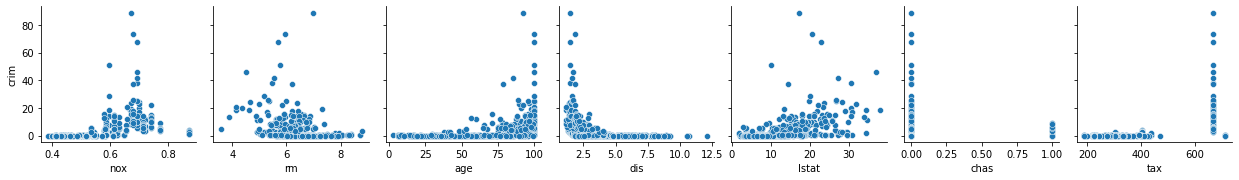

In [ ]:
sns.pairplot(boston, y_vars=['crim'], x_vars=['nox', 'rm', 'age', 'dis', 'lstat', 'chas','tax'])

**(b) Fit a multiple regression model to predict the response using all of the predictors. De-
scribe your results. For which predictors can we reject the null hypothesis H0 : βj= 0?**

In [ ]:
Y = boston['crim']
X = boston[['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']]
X = sm.add_constant(X, prepend=True)
model = sm.OLS(y, X)
result1 = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     32.55
Date:                Sat, 23 Oct 2021   Prob (F-statistic):           4.84e-55
Time:                        23:37:00   Log-Likelihood:                -1658.8
No. Observations:                 506   AIC:                             3344.
Df Residuals:                     493   BIC:                             3398.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9967      6.979      1.432      0.1

For the predictors DIS, RAD, BLACK, LSTAT, we can reject the null hypothesis as P-Value is less than 0.05.

**(c) How do your results from (a) compare to your results from (b)? Create a plot displaying
the univariate regression coefficients from (a) on the x-axis, and the multiple regression coefficients
from (b) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its
coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in
the multiple linear regression model is shown on the y-axis.**

[(-7.70423, 0.9314300000000001),
 Text(0, 0.5, 'Multiple regression coefficients'),
 (-4.38073, 32.94513),
 Text(0.5, 0, 'Univariate regression coefficients')]

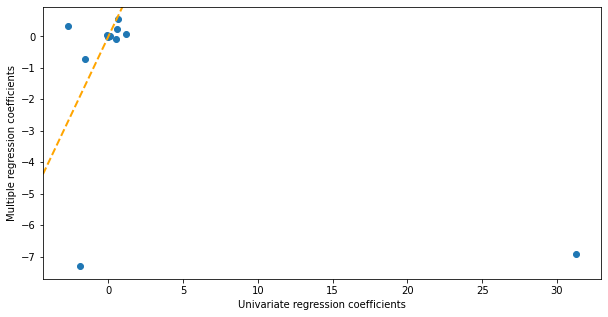

In [ ]:
uniReg=[-0.0739,0.5098,-1.8928,31.2485,-2.6841,0.1078,-1.5509,0.6179,0.0297,1.1520,-0.0363,0.5488]
multiReg=[0.0364,-0.0694,-7.3117,-6.9288,0.3348,0.0013,-0.7089,0.5389,-0.0014,0.0834,-0.0096,0.2356]

fig = plt.figure(figsize = (10, 5))
ax = plt.axes()
ax.scatter(uniReg, multiReg)
xlimit = ax.get_xlim()
ylimit = ax.get_ylim()
ax.plot(xlimit, xlimit, color = "orange", linestyle = "--", linewidth = 2)
ax.set(xlabel = "Univariate regression coefficients", ylabel = "Multiple regression coefficients",
       xlim = xlimit, ylim = ylimit)

From above plot, some the coefficients increased between the univariate regressions and the multiple regression for some predictors, as some are on right side of orange line,
Some predictors lie above and are on left side of orange line are still same in both regressions y=x. 
One predictor is decresed to ~-7

**d.Is there evidence of non-linear association between any of the predictors and the re-
sponse? To answer this question, for each predictor x, fit a model of the form
y = β0 + β1x + β2x2 + β3x3 + e**

chas does not provide any additional information because chas have only two values: 1 if the town borders the Charles River or else 0. 

In [ ]:
predictors = boston.columns.drop("chas")
predictors

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [ ]:
Boston_columns = predictors
for t in Boston_columns:
    reg = ols("crim~ boston[t]+I(pow(boston[t],2)) +\
              I(pow(boston[t],3))", data = boston).fit()
    print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     49.67
Date:                Sun, 24 Oct 2021   Prob (F-statistic):           3.98e-28
Time:                        02:20:32   Log-Likelihood:                -1740.6
No. Observations:                 506   AIC:                             3489.
Df Residuals:                     502   BIC:                             3506.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.8241 

From above result medv, indus, nox,dis, zn, rm, age, tax, and ptratio, rad, black, lstat have evidence of a non-linear relationship.
but chas does not have any evidence of a non-linear relationship.